In [1]:
import os
import pandas as pd
import numpy as np

from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/DELL/Desktop/Master_FIEK/Pergaditja dhe vizualizimi i te dhenave/GFP_dataset/global_food_prices.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050638 entries, 0 to 2050637
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   adm0_id             float64
 1   adm0_name           object 
 2   adm1_id             int64  
 3   adm1_name           object 
 4   mkt_id              int64  
 5   mkt_name            object 
 6   cm_id               int64  
 7   cm_name             object 
 8   cur_id              float64
 9   cur_name            object 
 10  pt_id               int64  
 11  pt_name             object 
 12  um_id               int64  
 13  um_name             object 
 14  mp_month            int64  
 15  mp_year             int64  
 16  mp_price            float64
 17  mp_commoditysource  float64
dtypes: float64(4), int64(7), object(7)
memory usage: 281.6+ MB


In [4]:
#identifying null vallues 
df.isnull().sum()

adm0_id                     0
adm0_name                   0
adm1_id                     0
adm1_name              611016
mkt_id                      0
mkt_name                    0
cm_id                       0
cm_name                     0
cur_id                      0
cur_name                    0
pt_id                       0
pt_name                     0
um_id                       0
um_name                     0
mp_month                    0
mp_year                     0
mp_price                    0
mp_commoditysource    2050638
dtype: int64

In [5]:
#handling columns with null values 
df=df.drop(['adm1_name', 'mp_commoditysource'], axis = 1)

In [6]:
#get unique values for unit's used column 
df.um_name.unique()

array(['KG', 'Day', 'Unit', 'L', 'USD/LCU', '30 pcs', '500 G', '125 G',
       'Packet', '900 G', '50 Pounds', '100 KG', '46 KG', '11.5 KG',
       'Pound', 'Cuartilla', 'Libra', '5 L', '10 pcs', '90 KG', '1 piece',
       '400 G', '15 KG', '5 KG', '12 KG', '20 KG', '120 KG', '20 L',
       '18 KG', '50 KG', '160 KG', '1.5 L', 'Sack', 'Package', 'Head',
       'MT', '85 G', 'Gallon', '380 G', '500 ML', 'Month', 'Course',
       '100 Pounds', '168 G', '45 KG', '70 G', '200 G', '68 KG', '109 KG',
       '91 KG', '93 KG', '10 KG', 'Bunch', '250 KG', '100 Tubers',
       '73 KG', '84 KG', '52 KG', '27 KG', '16 KG', '650 G', '750 ML',
       '115 G', '360 pcs', '50 pcs', '100 pcs', 'Marmite', '350 G',
       '385 G', '1.8 KG', 'Cylinder', '4 pcs', '150 ml', '2 KG', '1.8 L',
       '170 G', '1.5 KG', '300 G', '0.8 KG', '160 G', '750 G', '12.5 KG',
       '200 ML', '150 G', '1.3 KG', '185 G', 'Loaf', '2.25 KG', '5 pcs',
       '250 G', '11 KG', 'Brush', '100 ML', 'Bar', '250 ML', 'Pile',
    

In [7]:
#check the data that has bad data as it's unit 
irrelevant_units = ['1 GB', 'kWh', 'Day', 'Unit', 'Head',  'Month', 'Course', 'Bunch', 'Marmite', 'Brush', 'Cylinder', 'Pile', 'Heap', 'Bundle', 'Cubic meter']
df.um_name.isin(irrelevant_units)

0          False
1          False
2          False
3          False
4          False
           ...  
2050633    False
2050634    False
2050635    False
2050636    False
2050637    False
Name: um_name, Length: 2050638, dtype: bool

In [8]:
irrelevant_data = df[df.um_name.isin(irrelevant_units)]
print(irrelevant_data.shape)

(86679, 16)


In [9]:
print((len(irrelevant_data)/len(df))*100)

4.226928399844341


In [10]:
print(irrelevant_data.index)

Int64Index([    435,     436,     437,     438,     439,     440,     441,
                442,     443,     444,
            ...
            1996699, 1996700, 1996701, 1996702, 1996703, 1996704, 1996705,
            1996706, 1996707, 1996708],
           dtype='int64', length=86679)


In [12]:
df=df.drop(irrelevant_data.index, axis=0)

In [13]:
#test if irrelevant data is deleted 
irrelevant_data = df[df.um_name.isin(irrelevant_units)]
print(irrelevant_data.shape)

(0, 16)


In [ ]:
#drop columns that don't represent useful information for our project
df=df.drop(['mkt_id', 'mkt_name'], axis = 1)

In [16]:
#drop columns that don't represent useful information for our project
df=df.drop(['cm_id', 'um_id'], axis = 1)

In [17]:
print(df.shape)

(1963959, 12)


In [18]:
#get currencies used
df.cur_name.unique()

array(['AFN', 'DZD', 'AOA', 'ARS', 'AMD', 'AZN', 'BDT', 'INR', 'BYR',
       'XOF', 'BTN', 'BOB', 'BIF', 'KHR', 'XAF', 'CVE', 'CNY', 'COP',
       'USD', 'CDF', 'DJF', 'DOP', 'EGP', 'ERN', 'ETB', 'GMD', 'GEL',
       'GHS', 'GTQ', 'GNF', 'HTG', 'HNL', 'IDR', 'IRR', 'IQD', 'JPY',
       'JOD', 'KZT', 'KES', 'KGS', 'LAK', 'LBP', 'LSL', 'LRD', 'LYD',
       'MGA', 'MWK', 'MRO', 'MXN', 'MDL', 'MNT', 'MZN', 'MMK', 'NAD',
       'NPR', 'NIO', 'NGN', 'PKR', 'PAB', 'PYG', 'PEN', 'PHP', 'RUB',
       'RWF', 'SLL', 'SOS', 'ZAR', 'SSP', 'LKR', 'NIS', 'SDG', 'SZL',
       'SYP', 'TJS', 'THB', 'TRY', 'UGX', 'UAH', 'TZS', 'VEF', 'VND',
       'YER', 'ZMW', 'ZWL'], dtype=object)

In [19]:
df['mm']=df['cur_name']
df['um']=df['um_name']

In [26]:
df.loc[df.um =='500 G',['um','mm']] = df[df['um']=='500 G']['mm']/0.5
df.loc[df.um =='125 G',['um','mm']] = df[df['um']=='125 G']['mm']/0.125
df.loc[df.um =='900 G',['um','mm']] = df[df['um']=='900 G']['mm']/0.9
df.loc[df.um =='85 G',['um','mm']] = df[df['um']=='85 G']['mm']/0.085
df.loc[df.um =='380 G',['um','mm']] = df[df['um']=='380 G']['mm']/0.38
df.loc[df.um =='168 G',['um','mm']] = df[df['um']=='168 G']['mm']/0.168
df.loc[df.um =='70 G',['um','mm']] = df[df['um']=='70 G']['mm']/0.07
df.loc[df.um =='200 G',['um','mm']] = df[df['um']=='200 G']['mm']/0.2
df.loc[df.um =='650 G',['um','mm']] = df[df['um']=='650 G']['mm']/0.65
df.loc[df.um =='115 G',['um','mm']] = df[df['um']=='115 G']['mm']/0.115
df.loc[df.um =='350 G',['um','mm']] = df[df['um']=='350 G']['mm']/0.35
df.loc[df.um =='385 G',['um','mm']] = df[df['um']=='385 G']['mm']/0.385
df.loc[df.um =='170 G',['um','mm']] = df[df['um']=='170 G']['mm']/0.17
df.loc[df.um =='300 G',['um','mm']] = df[df['um']=='300 G']['mm']/0.3
df.loc[df.um =='160 G',['um','mm']] = df[df['um']=='160 G']['mm']/0.16
df.loc[df.um =='750 G',['um','mm']] = df[df['um']=='750 G']['mm']/0.75
df.loc[df.um =='250 G',['um','mm']] = df[df['um']=='250 G']['mm']/0.25
df.loc[df.um =='20 G',['um','mm']] = df[df['um']=='20 G']['mm']/0.02
df.loc[df.um =='700 G',['um','mm']] = df[df['um']=='700 G']['mm']/0.7
df.loc[df.um =='800 G',['um','mm']] = df[df['um']=='800 G']['mm']/0.8
df.loc[df.um =='400 G',['um','mm']] = df[df['um']=='400 G']['mm']/0.4
df.loc[df.um =='100 KG',['um','mm']] = df[df['um']=='100 KG']['mm']/100
df.loc[df.um =='46 KG',['um','mm']] = df[df['um']=='46 KG']['mm']/46
df.loc[df.um =='11.5 KG',['um','mm']] = df[df['um']=='11.5 KG']['mm']/11.5
df.loc[df.um =='90 KG',['um','mm']] = df[df['um']=='90 KG']['mm']/90
df.loc[df.um =='15 KG',['um','mm']] = df[df['um']=='15 KG']['mm']/15
df.loc[df.um =='5 KG',['um','mm']] = df[df['um']=='5 KG']['mm']/5
df.loc[df.um =='12 KG',['um','mm']] = df[df['um']=='12 KG']['mm']/12
df.loc[df.um =='20 KG',['um','mm']] = df[df['um']=='20 KG']['mm']/20
df.loc[df.um =='120 KG',['um','mm']] = df[df['um']=='120 KG']['mm']/120
df.loc[df.um =='18 KG',['um','mm']] = df[df['um']=='18 KG']['mm']/18
df.loc[df.um =='50 KG',['um','mm']] = df[df['um']=='50 KG']['mm']/50
df.loc[df.um =='160 KG',['um','mm']] = df[df['um']=='160 KG']['mm']/160
df.loc[df.um =='45 KG',['um','mm']] = df[df['um']=='45 KG']['mm']/45
df.loc[df.um =='68 KG',['um','mm']] = df[df['um']=='68 KG']['mm']/68
df.loc[df.um =='109 KG',['um','mm']] = df[df['um']=='109 KG']['mm']/109
df.loc[df.um =='91 KG',['um','mm']] = df[df['um']=='91 KG']['mm']/91
df.loc[df.um =='93 KG',['um','mm']] = df[df['um']=='93 KG']['mm']/93
df.loc[df.um =='10 KG',['um','mm']] = df[df['um']=='10 KG']['mm']/10
df.loc[df.um =='250 KG',['um','mm']] = df[df['um']=='250 KG']['mm']/250
df.loc[df.um =='73 KG',['um','mm']] = df[df['um']=='73 KG']['mm']/73
df.loc[df.um =='84 KG',['um','mm']] = df[df['um']=='84 KG']['mm']/84
df.loc[df.um =='52 KG',['um','mm']] = df[df['um']=='52 KG']['mm']/52
df.loc[df.um =='27 KG',['um','mm']] = df[df['um']=='27 KG']['mm']/27
df.loc[df.um =='16 KG',['um','mm']] = df[df['um']=='16 KG']['mm']/16
df.loc[df.um =='1.8 KG',['um','mm']] = df[df['um']=='1.8 KG']['mm']/1.8
df.loc[df.um =='2 KG',['um','mm']] = df[df['um']=='2 KG']['mm']/2
df.loc[df.um =='3.4 KG',['um','mm']] = df[df['um']=='3.4 KG']['mm']/3.4
df.loc[df.um =='0.5 KG',['um','mm']] = df[df['um']=='0.5 KG']['mm']/0.5
df.loc[df.um =='1.1 KG',['um','mm']] = df[df['um']=='1.1 KG']['mm']/1.1
df.loc[df.um =='2.1 KG',['um','mm']] = df[df['um']=='2.1 KG']['mm']/2.1
df.loc[df.um =='1.2 KG',['um','mm']] = df[df['um']=='1.2 KG']['mm']/1.2
df.loc[df.um =='3.1 KG',['um','mm']] = df[df['um']=='3.1 KG']['mm']/3.1
df.loc[df.um =='3.5 KG',['um','mm']] = df[df['um']=='3.5 KG']['mm']/3.5
df.loc[df.um =='LCU/3.5kg',['um','mm']] = df[df['um']=='LCU/3.5kg']['mm']/3.5
df.loc[df.um =='25 KG',['um','mm']] = df[df['um']=='25 KG']['mm']/25
df.loc[df.um =='60 KG',['um','mm']] = df[df['um']=='60 KG']['mm']/60
df.loc[df.um =='3 KG',['um','mm']] = df[df['um']=='3 KG']['mm']/3
df.loc[df.um =='2.5 KG',['um','mm']] = df[df['um']=='2.5 KG']['mm']/2.5
df.loc[df.um =='11 KG',['um','mm']] = df[df['um']=='11 KG']['mm']/11
df.loc[df.um =='1.6 KG',['um','mm']] = df[df['um']=='1.6 KG']['mm']/1.6
df.loc[df.um =='1.4 KG',['um','mm']] = df[df['um']=='1.4 KG']['mm']/1.4
df.loc[df.um =='1.5 KG',['um','mm']] = df[df['um']=='1.5 KG']['mm']/1.5
df.loc[df.um =='0.8 KG',['um','mm']] = df[df['um']=='0.8 KG']['mm']/0.8
df.loc[df.um =='2.25 KG',['um','mm']] = df[df['um']=='2.25 KG']['mm']/2.25
df.loc[df.um =='12.5 KG',['um','mm']] = df[df['um']=='12.5 KG']['mm']/12.5
df.loc[df.um =='1.3 KG',['um','mm']] = df[df['um']=='1.3 KG']['mm']/1.3

In [21]:
df['mm'] = pd.to_numeric(df['mm'],errors = 'coerce')

In [27]:
df.tail()

,adm0_id,adm0_name,adm1_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_name,mp_month,mp_year,mp_price,mm,um
2050633,271.0,Zimbabwe,3444,Beans (sugar) - Retail,0.0,ZWL,15,Retail,KG,6,2021,233.3333,NaN,KG
2050634,271.0,Zimbabwe,3444,Toothpaste - Retail,0.0,ZWL,15,Retail,100 ML,6,2021,112.5000,NaN,100 ML
2050635,271.0,Zimbabwe,3444,Laundry soap - Retail,0.0,ZWL,15,Retail,KG,6,2021,114.0000,NaN,KG
2050636,271.0,Zimbabwe,3444,Handwash soap - Retail,0.0,ZWL,15,Retail,250 G,6,2021,59.5000,NaN,NaN
2050637,271.0,Zimbabwe,3444,Fish (kapenta) - Retail,0.0,ZWL,15,Retail,KG,6,2021,1200.0000,NaN,KG


In [29]:
df.mm.unique()

array([nan])

In [30]:
df['mm']=df['cur_name']

In [31]:
df.tail()

,adm0_id,adm0_name,adm1_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_name,mp_month,mp_year,mp_price,mm,um
2050633,271.0,Zimbabwe,3444,Beans (sugar) - Retail,0.0,ZWL,15,Retail,KG,6,2021,233.3333,ZWL,KG
2050634,271.0,Zimbabwe,3444,Toothpaste - Retail,0.0,ZWL,15,Retail,100 ML,6,2021,112.5000,ZWL,100 ML
2050635,271.0,Zimbabwe,3444,Laundry soap - Retail,0.0,ZWL,15,Retail,KG,6,2021,114.0000,ZWL,KG
2050636,271.0,Zimbabwe,3444,Handwash soap - Retail,0.0,ZWL,15,Retail,250 G,6,2021,59.5000,ZWL,NaN
2050637,271.0,Zimbabwe,3444,Fish (kapenta) - Retail,0.0,ZWL,15,Retail,KG,6,2021,1200.0000,ZWL,KG


In [39]:
df.loc[df.mm == 'AFN',['mm','mp_price']] = df[df['cur_name']=='AFN']['mp_price']*0.011
df.loc[df.mm == 'ZWL',['mm','mp_price']] = df[df['cur_name']=='ZWL']['mp_price']*0.0027
df.loc[df.mm == 'AMD',['mm','mp_price']] = df[df['cur_name']=='AMD']['mp_price']*0.0021
df.loc[df.mm == 'AOA',['mm','mp_price']] = df[df['cur_name']=='AOA']['mp_price']*0.0017
df.loc[df.mm == 'ARS',['mm','mp_price']] = df[df['cur_name']=='ARS']['mp_price']*0.0100
df.loc[df.mm == 'AZN',['mm','mp_price']] = df[df['cur_name']=='AZN']['mp_price']*0.59
df.loc[df.mm == 'BDT',['mm','mp_price']] = df[df['cur_name']=='BDT']['mp_price']*0.012
df.loc[df.mm == 'BIF',['mm','mp_price']] = df[df['cur_name']=='BIF']['mp_price']*0.00050
df.loc[df.mm == 'BOB',['mm','mp_price']] = df[df['cur_name']=='BOB']['mp_price']*0.14
df.loc[df.mm == 'BTN',['mm','mp_price']] = df[df['cur_name']=='BTN']['mp_price']*0.013;
df.loc[df.mm == 'BYR',['mm','mp_price']]  = df[df['cur_name']=='BYR']['mp_price']*0.041;
df.loc[df.mm == 'CDF',['mm','mp_price']] = df[df['cur_name']=='CDF']['mp_price']*0.00050;
df.loc[df.mm == 'CNY',['mm','mp_price']] = df[df['cur_name']=='CNY']['mp_price']*0.16;
df.loc[df.mm == 'COP',['mm','mp_price']] = df[df['cur_name']=='COP']['mp_price']*0.00026;
df.loc[df.mm == 'CVE',['mm','mp_price']] = df[df['cur_name']=='CVE']['mp_price']*0.0103;
df.loc[df.mm == 'DJF',['mm','mp_price']] = df[df['cur_name']=='DJF']['mp_price']*0.0056;
df.loc[df.mm == 'DOP',['mm','mp_price']] = df[df['cur_name']=='DOP']['mp_price']*0.018;
df.loc[df.mm == 'DZD',['mm','mp_price']] = df[df['cur_name']=='DZD']['mp_price']*0.0072;
df.loc[df.mm == 'EGP',['mm','mp_price']] = df[df['cur_name']=='EGP']['mp_price']*0.064;
df.loc[df.mm == 'ERN',['mm','mp_price']] = df[df['cur_name']=='ERN']['mp_price']*0.066;
df.loc[df.mm == 'ETB',['mm','mp_price']] = df[df['cur_name']=='ETB']['mp_price']*0.021;
df.loc[df.mm == 'GEL',['mm','mp_price']] = df[df['cur_name']=='GEL']['mp_price']*0.32;
df.loc[df.mm == 'GHS',['mm','mp_price']] = df[df['cur_name']=='GHS']['mp_price']*0.16;
df.loc[df.mm == 'GMD',['mm','mp_price']] = df[df['cur_name']=='GMD']['mp_price']*0.019;
df.loc[df.mm == 'GNF',['mm','mp_price']] = df[df['cur_name']=='GNF']['mp_price']*0.00011;
df.loc[df.mm == 'GTQ',['mm','mp_price']] = df[df['cur_name']=='GTQ']['mp_price']*0.13;
df.loc[df.mm == 'HNL',['mm','mp_price']] = df[df['cur_name']=='HNL']['mp_price']*0.041;
df.loc[df.mm == 'HTG',['mm','mp_price']] = df[df['cur_name']=='HTG']['mp_price']*0.010;
df.loc[df.mm == 'IDR',['mm','mp_price']] = df[df['cur_name']=='IDR']['mp_price']*0.000070;
df.loc[df.mm == 'INR',['mm','mp_price']] = df[df['cur_name']=='INR']['mp_price']*0.013;
df.loc[df.mm == 'IQD',['mm','mp_price']] = df[df['cur_name']=='IQD']['mp_price']*0.00068;
df.loc[df.mm == 'IRR',['mm','mp_price']] = df[df['cur_name']=='IRR']['mp_price']*0.000024;
df.loc[df.mm == 'JOD',['mm','mp_price']] = df[df['cur_name']=='JOD']['mp_price']*1.41;
df.loc[df.mm == 'JPY',['mm','mp_price']] = df[df['cur_name']=='JPY']['mp_price']*0.0087;
df.loc[df.mm == 'KES',['mm','mp_price']] = df[df['cur_name']=='KES']['mp_price']*0.0089;
df.loc[df.mm == 'KGS',['mm','mp_price']] = df[df['cur_name']=='KGS']['mp_price']*0.012;
df.loc[df.mm == 'KHR',['mm','mp_price']] = df[df['cur_name']=='KHR']['mp_price']*0.00025;
df.loc[df.mm == 'KZT',['mm','mp_price']] = df[df['cur_name']=='KZT']['mp_price']*0.0023;
df.loc[df.mm == 'LAK',['mm','mp_price']] = df[df['cur_name']=='LAK']['mp_price']*0.000094;
df.loc[df.mm == 'LBP',['mm','mp_price']] = df[df['cur_name']=='LBP']['mp_price']*0.00065;
df.loc[df.mm == 'LKR',['mm','mp_price']] = df[df['cur_name']=='LKR']['mp_price']*0.0050;
df.loc[df.mm == 'LRD',['mm','mp_price']] = df[df['cur_name']=='LRD']['mp_price']*0.0070;
df.loc[df.mm == 'LSL',['mm','mp_price']] = df[df['cur_name']=='LSL']['mp_price']*0.064;
df.loc[df.mm == 'LYD',['mm','mp_price']] = df[df['cur_name']=='LYD']['mp_price']*0.22;
df.loc[df.mm == 'MDL',['mm','mp_price']] = df[df['cur_name']=='MDL']['mp_price']*0.057;
df.loc[df.mm == 'MMK',['mm','mp_price']] = df[df['cur_name']=='MMK']['mp_price']*0.00057;

In [40]:
df.tail()

,adm0_id,adm0_name,adm1_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_name,mp_month,mp_year,mp_price,mm,um
2050633,271.0,Zimbabwe,3444,Beans (sugar) - Retail,0.0,ZWL,15,Retail,KG,6,2021,0.63000,0.63,KG
2050634,271.0,Zimbabwe,3444,Toothpaste - Retail,0.0,ZWL,15,Retail,100 ML,6,2021,0.30375,0.30375,100 ML
2050635,271.0,Zimbabwe,3444,Laundry soap - Retail,0.0,ZWL,15,Retail,KG,6,2021,0.30780,0.3078,KG
2050636,271.0,Zimbabwe,3444,Handwash soap - Retail,0.0,ZWL,15,Retail,250 G,6,2021,0.16065,0.16065,NaN
2050637,271.0,Zimbabwe,3444,Fish (kapenta) - Retail,0.0,ZWL,15,Retail,KG,6,2021,3.24000,3.24,KG


In [43]:
df['um']=df['um_name']

In [44]:
df.tail()

,adm0_id,adm0_name,adm1_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_name,mp_month,mp_year,mp_price,mm,um
2050633,271.0,Zimbabwe,3444,Beans (sugar) - Retail,0.0,ZWL,15,Retail,KG,6,2021,0.63000,0.63,KG
2050634,271.0,Zimbabwe,3444,Toothpaste - Retail,0.0,ZWL,15,Retail,100 ML,6,2021,0.30375,0.30375,100 ML
2050635,271.0,Zimbabwe,3444,Laundry soap - Retail,0.0,ZWL,15,Retail,KG,6,2021,0.30780,0.3078,KG
2050636,271.0,Zimbabwe,3444,Handwash soap - Retail,0.0,ZWL,15,Retail,250 G,6,2021,0.16065,0.16065,250 G
2050637,271.0,Zimbabwe,3444,Fish (kapenta) - Retail,0.0,ZWL,15,Retail,KG,6,2021,3.24000,3.24,KG


In [48]:
df.loc[df.um =='500 G',['um','mm']] = df[df['um']=='500 G']['mm']/0.5
df.loc[df.um =='125 G',['um','mm']] = df[df['um']=='125 G']['mm']/0.125
df.loc[df.um =='900 G',['um','mm']] = df[df['um']=='900 G']['mm']/0.9
df.loc[df.um =='85 G',['um','mm']] = df[df['um']=='85 G']['mm']/0.085
df.loc[df.um =='380 G',['um','mm']] = df[df['um']=='380 G']['mm']/0.38
df.loc[df.um =='168 G',['um','mm']] = df[df['um']=='168 G']['mm']/0.168
df.loc[df.um =='70 G',['um','mm']] = df[df['um']=='70 G']['mm']/0.07
df.loc[df.um =='200 G',['um','mm']] = df[df['um']=='200 G']['mm']/0.2
df.loc[df.um =='650 G',['um','mm']] = df[df['um']=='650 G']['mm']/0.65
df.loc[df.um =='115 G',['um','mm']] = df[df['um']=='115 G']['mm']/0.115
df.loc[df.um =='350 G',['um','mm']] = df[df['um']=='350 G']['mm']/0.35
df.loc[df.um =='385 G',['um','mm']] = df[df['um']=='385 G']['mm']/0.385
df.loc[df.um =='170 G',['um','mm']] = df[df['um']=='170 G']['mm']/0.17
df.loc[df.um =='300 G',['um','mm']] = df[df['um']=='300 G']['mm']/0.3
df.loc[df.um =='160 G',['um','mm']] = df[df['um']=='160 G']['mm']/0.16
df.loc[df.um =='750 G',['um','mm']] = df[df['um']=='750 G']['mm']/0.75
df.loc[df.um =='250 G',['um','mm']] = df[df['um']=='250 G']['mm']/0.25
df.loc[df.um =='20 G',['um','mm']] = df[df['um']=='20 G']['mm']/0.02
df.loc[df.um =='700 G',['um','mm']] = df[df['um']=='700 G']['mm']/0.7
df.loc[df.um =='800 G',['um','mm']] = df[df['um']=='800 G']['mm']/0.8
df.loc[df.um =='400 G',['um','mm']] = df[df['um']=='400 G']['mm']/0.4
df.loc[df.um =='100 KG',['um','mm']] = df[df['um']=='100 KG']['mm']/100
df.loc[df.um =='46 KG',['um','mm']] = df[df['um']=='46 KG']['mm']/46
df.loc[df.um =='11.5 KG',['um','mm']] = df[df['um']=='11.5 KG']['mm']/11.5
df.loc[df.um =='90 KG',['um','mm']] = df[df['um']=='90 KG']['mm']/90
df.loc[df.um =='15 KG',['um','mm']] = df[df['um']=='15 KG']['mm']/15
df.loc[df.um =='5 KG',['um','mm']] = df[df['um']=='5 KG']['mm']/5
df.loc[df.um =='12 KG',['um','mm']] = df[df['um']=='12 KG']['mm']/12
df.loc[df.um =='20 KG',['um','mm']] = df[df['um']=='20 KG']['mm']/20
df.loc[df.um =='120 KG',['um','mm']] = df[df['um']=='120 KG']['mm']/120
df.loc[df.um =='18 KG',['um','mm']] = df[df['um']=='18 KG']['mm']/18
df.loc[df.um =='50 KG',['um','mm']] = df[df['um']=='50 KG']['mm']/50
df.loc[df.um =='160 KG',['um','mm']] = df[df['um']=='160 KG']['mm']/160
df.loc[df.um =='45 KG',['um','mm']] = df[df['um']=='45 KG']['mm']/45
df.loc[df.um =='68 KG',['um','mm']] = df[df['um']=='68 KG']['mm']/68
df.loc[df.um =='109 KG',['um','mm']] = df[df['um']=='109 KG']['mm']/109
df.loc[df.um =='91 KG',['um','mm']] = df[df['um']=='91 KG']['mm']/91
df.loc[df.um =='93 KG',['um','mm']] = df[df['um']=='93 KG']['mm']/93
df.loc[df.um =='10 KG',['um','mm']] = df[df['um']=='10 KG']['mm']/10
df.loc[df.um =='250 KG',['um','mm']] = df[df['um']=='250 KG']['mm']/250
df.loc[df.um =='73 KG',['um','mm']] = df[df['um']=='73 KG']['mm']/73
df.loc[df.um =='84 KG',['um','mm']] = df[df['um']=='84 KG']['mm']/84
df.loc[df.um =='52 KG',['um','mm']] = df[df['um']=='52 KG']['mm']/52
df.loc[df.um =='27 KG',['um','mm']] = df[df['um']=='27 KG']['mm']/27
df.loc[df.um =='16 KG',['um','mm']] = df[df['um']=='16 KG']['mm']/16
df.loc[df.um =='1.8 KG',['um','mm']] = df[df['um']=='1.8 KG']['mm']/1.8
df.loc[df.um =='2 KG',['um','mm']] = df[df['um']=='2 KG']['mm']/2
df.loc[df.um =='3.4 KG',['um','mm']] = df[df['um']=='3.4 KG']['mm']/3.4
df.loc[df.um =='0.5 KG',['um','mm']] = df[df['um']=='0.5 KG']['mm']/0.5
df.loc[df.um =='1.1 KG',['um','mm']] = df[df['um']=='1.1 KG']['mm']/1.1
df.loc[df.um =='2.1 KG',['um','mm']] = df[df['um']=='2.1 KG']['mm']/2.1
df.loc[df.um =='1.2 KG',['um','mm']] = df[df['um']=='1.2 KG']['mm']/1.2
df.loc[df.um =='3.1 KG',['um','mm']] = df[df['um']=='3.1 KG']['mm']/3.1
df.loc[df.um =='3.5 KG',['um','mm']] = df[df['um']=='3.5 KG']['mm']/3.5
df.loc[df.um =='LCU/3.5kg',['um','mm']] = df[df['um']=='LCU/3.5kg']['mm']/3.5
df.loc[df.um =='25 KG',['um','mm']] = df[df['um']=='25 KG']['mm']/25
df.loc[df.um =='60 KG',['um','mm']] = df[df['um']=='60 KG']['mm']/60
df.loc[df.um =='3 KG',['um','mm']] = df[df['um']=='3 KG']['mm']/3
df.loc[df.um =='2.5 KG',['um','mm']] = df[df['um']=='2.5 KG']['mm']/2.5
df.loc[df.um =='11 KG',['um','mm']] = df[df['um']=='11 KG']['mm']/11
df.loc[df.um =='1.6 KG',['um','mm']] = df[df['um']=='1.6 KG']['mm']/1.6
df.loc[df.um =='1.4 KG',['um','mm']] = df[df['um']=='1.4 KG']['mm']/1.4
df.loc[df.um =='1.5 KG',['um','mm']] = df[df['um']=='1.5 KG']['mm']/1.5
df.loc[df.um =='0.8 KG',['um','mm']] = df[df['um']=='0.8 KG']['mm']/0.8
df.loc[df.um =='2.25 KG',['um','mm']] = df[df['um']=='2.25 KG']['mm']/2.25
df.loc[df.um =='12.5 KG',['um','mm']] = df[df['um']=='12.5 KG']['mm']/12.5
df.loc[df.um =='1.3 KG',['um','mm']] = df[df['um']=='1.3 KG']['mm']/1.3

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963959 entries, 0 to 2050637
Data columns (total 14 columns):
 #   Column     Dtype  
---  ------     -----  
 0   adm0_id    float64
 1   adm0_name  object 
 2   adm1_id    int64  
 3   cm_name    object 
 4   cur_id     float64
 5   cur_name   object 
 6   pt_id      int64  
 7   pt_name    object 
 8   um_name    object 
 9   mp_month   int64  
 10  mp_year    int64  
 11  mp_price   float64
 12  mm         object 
 13  um         object 
dtypes: float64(3), int64(4), object(7)
memory usage: 224.8+ MB


In [47]:
df['mm'] = pd.to_numeric(df['mm'],errors = 'coerce')

In [49]:
df.tail()

,adm0_id,adm0_name,adm1_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_name,mp_month,mp_year,mp_price,mm,um
2050633,271.0,Zimbabwe,3444,Beans (sugar) - Retail,0.0,ZWL,15,Retail,KG,6,2021,0.63000,0.63000,KG
2050634,271.0,Zimbabwe,3444,Toothpaste - Retail,0.0,ZWL,15,Retail,100 ML,6,2021,0.30375,0.30375,100 ML
2050635,271.0,Zimbabwe,3444,Laundry soap - Retail,0.0,ZWL,15,Retail,KG,6,2021,0.30780,0.30780,KG
2050636,271.0,Zimbabwe,3444,Handwash soap - Retail,0.0,ZWL,15,Retail,250 G,6,2021,0.16065,0.64260,0.6426
2050637,271.0,Zimbabwe,3444,Fish (kapenta) - Retail,0.0,ZWL,15,Retail,KG,6,2021,3.24000,3.24000,KG


In [50]:
#since all prices are converted to dollar, currency related columns are not needed anymore
df=df.drop(['cur_id', 'cur_name'], axis = 1)

In [51]:
df.loc[df.um =='Pound',['um','mm']] = df[df['um']=='Pound']['mm']/0.453592
df.loc[df.um =='50 Pounds',['um','mm']] = df[df['um']=='50 Pounds']['mm']/0.453592/50
df.loc[df.um =='Cuartilla',['um','mm']] = df[df['um']=='Cuartilla']['mm']/2.88
df.loc[df.um =='Libra',['um','mm']] = df[df['um']=='Libra']['mm']/1
df.loc[df.um =='Sack',['um','mm']] = df[df['um']=='Sack']['mm']/98
df.loc[df.um =='MT',['um','mm']] = df[df['um']=='MT']['mm']/1000
df.loc[df.um =='Gallon',['um','mm']] = df[df['um']=='Gallon']['mm']/3.78
df.loc[df.um =='100 Pounds',['um','mm']] = df[df['um']=='100 Pounds']['mm']/0.453592/100
df.loc[df.um =='L',['um','mm']] = df[df['um']=='L']['mm']/1
df.loc[df.um =='5 L',['um','mm']] = df[df['um']=='5 L']['mm']/5
df.loc[df.um =='20 L',['um','mm']] = df[df['um']=='20 L']['mm']/20
df.loc[df.um =='1.5 L',['um','mm']] = df[df['um']=='1.5 L']['mm']/1.5
df.loc[df.um =='500 ML',['um','mm']] = df[df['um']=='500 ML']['mm']/0.5
df.loc[df.um =='750 ML',['um','mm']] = df[df['um']=='750 ML']['mm']/0.75
df.loc[df.um =='150 ml',['um','mm']] = df[df['um']=='150 ml']['mm']/0.15
df.loc[df.um =='1.8 L',['um','mm']] = df[df['um']=='1.8 L']['mm']/1.8
df.loc[df.um =='200 ML',['um','mm']] = df[df['um']=='200 ML']['mm']/0.2
df.loc[df.um =='100 ML',['um','mm']] = df[df['um']=='100 ML']['mm']/0.1
df.loc[df.um =='250 ML',['um','mm']] = df[df['um']=='250 ML']['mm']/0.25
df.loc[df.um =='100 L',['um','mm']] = df[df['um']=='100 L']['mm']/100
df.loc[df.um =='3 L',['um','mm']] = df[df['um']=='3 L']['mm']/3
df.loc[df.um =='900 ML',['um','mm']] = df[df['um']=='900 ML']['mm']/0.9
df.loc[df.um =='50 ML',['um','mm']] = df[df['um']=='50 ML']['mm']/0.05
df.loc[df.um == '1 piece', ['um','mp_price']] = df[df['um']=='1 piece']['mp_price']/1
df.loc[df.um =='360 pcs',['um','mm']] = df[df['um']=='360 pcs']['mm']/360
df.loc[df.um =='50 pcs',['um','mm']] = df[df['um']=='50 pcs']['mm']/50
df.loc[df.um =='100 pcs',['um','mm']] = df[df['um']=='100 pcs']['mm']/100
df.loc[df.um =='4 pcs',['um','mm']] = df[df['um']=='4 pcs']['mm']/4
df.loc[df.um =='5 pcs',['um','mm']] = df[df['um']=='5 pcs']['mm']/5
df.loc[df.um =='28 pcs',['um','mm']] = df[df['um']=='28 pcs']['mm']/28
df.loc[df.um =='Packet','um']= df[df['um']=='Packet']['mp_price']
df.loc[df.um =='Loaf','um']= df[df['um']=='Loaf']['mp_price']
df.loc[df.um =='Package','um']= df[df['um']=='Package']['mp_price']
df.loc[df.um =='100 Tubers','um']= df[df['um']=='100 Tubers']['mp_price']
df.loc[df.um =='Pair','um']= df[df['um']=='Pair']['mp_price']
df.loc[df.um =='Bar','um']= df[df['um']=='Bar']['mp_price']

In [52]:
df.tail()

,adm0_id,adm0_name,adm1_id,cm_name,pt_id,pt_name,um_name,mp_month,mp_year,mp_price,mm,um
2050633,271.0,Zimbabwe,3444,Beans (sugar) - Retail,15,Retail,KG,6,2021,0.63000,0.6300,KG
2050634,271.0,Zimbabwe,3444,Toothpaste - Retail,15,Retail,100 ML,6,2021,0.30375,3.0375,3.0375
2050635,271.0,Zimbabwe,3444,Laundry soap - Retail,15,Retail,KG,6,2021,0.30780,0.3078,KG
2050636,271.0,Zimbabwe,3444,Handwash soap - Retail,15,Retail,250 G,6,2021,0.16065,0.6426,0.6426
2050637,271.0,Zimbabwe,3444,Fish (kapenta) - Retail,15,Retail,KG,6,2021,3.24000,3.2400,KG


In [53]:
df.rename(columns={'adm0_id': 'country_id', 'adm0_name': 'country_name', 'adm1_id': 'locality_id', 'cm_name': 'commodity_purchased',
                   'pt_name': 'market_type' , 'um_name': 'unit_of_measurement',
                   'mp_month': 'month_recorded', 'mp_year': 'year_recorded',
                  'mp_price': 'price_paid', 'mm': 'price_in_baseCurrencyAndUnit',
                  'um': 'price_in_baseUnit'}, inplace=True)

In [54]:
df.tail()

,country_id,country_name,locality_id,commodity_purchased,pt_id,market_type,unit_of_measurement,month_recorded,year_recorded,price_paid,price_in_baseCurrencyAndUnit,price_in_baseUnit
2050633,271.0,Zimbabwe,3444,Beans (sugar) - Retail,15,Retail,KG,6,2021,0.63000,0.6300,KG
2050634,271.0,Zimbabwe,3444,Toothpaste - Retail,15,Retail,100 ML,6,2021,0.30375,3.0375,3.0375
2050635,271.0,Zimbabwe,3444,Laundry soap - Retail,15,Retail,KG,6,2021,0.30780,0.3078,KG
2050636,271.0,Zimbabwe,3444,Handwash soap - Retail,15,Retail,250 G,6,2021,0.16065,0.6426,0.6426
2050637,271.0,Zimbabwe,3444,Fish (kapenta) - Retail,15,Retail,KG,6,2021,3.24000,3.2400,KG


In [55]:
df=df.drop(['price_in_baseUnit'], axis = 1)

In [57]:
df.unit_of_measurement.unique()

array(['KG', 'L', 'USD/LCU', '30 pcs', '500 G', '125 G', 'Packet',
       '900 G', '50 Pounds', '100 KG', '46 KG', '11.5 KG', 'Pound',
       'Cuartilla', 'Libra', '5 L', '10 pcs', '90 KG', '1 piece', '400 G',
       '15 KG', '5 KG', '12 KG', '20 KG', '120 KG', '20 L', '18 KG',
       '50 KG', '160 KG', '1.5 L', 'Sack', 'Package', 'MT', '85 G',
       'Gallon', '380 G', '500 ML', '100 Pounds', '168 G', '45 KG',
       '70 G', '200 G', '68 KG', '109 KG', '91 KG', '93 KG', '10 KG',
       '250 KG', '100 Tubers', '73 KG', '84 KG', '52 KG', '27 KG',
       '16 KG', '650 G', '750 ML', '115 G', '360 pcs', '50 pcs',
       '100 pcs', '350 G', '385 G', '1.8 KG', '4 pcs', '150 ml', '2 KG',
       '1.8 L', '170 G', '1.5 KG', '300 G', '0.8 KG', '160 G', '750 G',
       '12.5 KG', '200 ML', '150 G', '1.3 KG', '185 G', 'Loaf', '2.25 KG',
       '5 pcs', '250 G', '11 KG', '100 ML', 'Bar', '250 ML', '1.6 KG',
       'Dozen', '100 L', '1.4 KG', '20 G', '3.4 KG', '0.5 KG', '1.1 KG',
       '2.1 KG', '1

In [59]:
df.shape

(1963959, 11)

In [61]:
#drop duplicates since we don't need them in our study
df = df.drop_duplicates(['country_id','locality_id','commodity_purchased','market_type','unit_of_measurement','month_recorded','year_recorded','price_in_baseCurrencyAndUnit'], keep='first')


In [62]:
df.shape

(1342093, 11)

In [63]:
from matplotlib import pyplot as plt

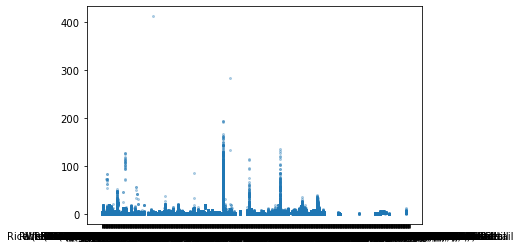

In [67]:
plt.plot(df.commodity_purchased,df.price_in_baseCurrencyAndUnit, 'o', markersize=2,alpha=0.3)
plt.show()

In [72]:
sample = df.sample(frac=0.1)

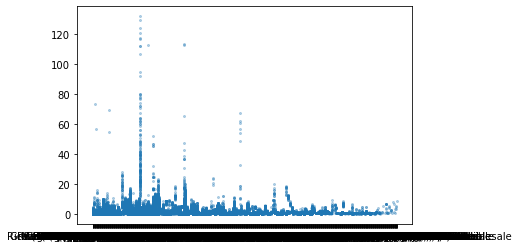

In [73]:
plt.plot(sample.commodity_purchased,sample.price_in_baseCurrencyAndUnit, 'o', markersize=2,alpha=0.3)
plt.show()

In [77]:
sample=sample.drop(['unit_of_measurement'], axis = 1)

In [78]:
sample.shape

(134209, 10)

In [115]:
#outliers detection
max_threshold = sample['price_in_baseCurrencyAndUnit'].quantile(0.99)
max_threshold

10.19024786400001

In [116]:
sample[sample['price_in_baseCurrencyAndUnit']>max_threshold]

,country_id,country_name,locality_id,commodity_purchased,pt_id,market_type,month_recorded,year_recorded,price_paid,price_in_baseCurrencyAndUnit
611903,94.0,Ghana,1324,Yam - Wholesale,14,Wholesale,7,2013,41.800000,41.800000
953378,141.0,Lebanon,1802,Milk (powder) - Retail,15,Retail,3,2020,9.443200,10.492444
318398,43.0,Burundi,40553,"Fish (lates,dry,local) - Retail",15,Retail,2,2021,13.583333,13.583333
807814,130.0,Jordan,1711,Meat (lamb) - Retail,15,Retail,3,2019,14.687970,14.687970
953161,141.0,Lebanon,1802,Beans (white) - Retail,15,Retail,4,2021,14.102580,14.102580
...,...,...,...,...,...,...,...,...,...,...
913949,141.0,Lebanon,1797,Milk (powder) - Retail,15,Retail,9,2013,9.930556,11.033951
617863,94.0,Ghana,1325,Yam - Wholesale,14,Wholesale,10,2012,27.400000,27.400000
622440,94.0,Ghana,1327,Eggs - Wholesale,14,Wholesale,10,2020,54.176000,54.176000
799336,130.0,Jordan,1707,Meat (beef) - Retail,15,Retail,11,2017,12.130230,12.130230


In [119]:
min_threshold = sample['price_in_baseCurrencyAndUnit'].quantile(0.1)
min_threshold

0.208

In [120]:
sample[sample['price_in_baseCurrencyAndUnit']<min_threshold]

,country_id,country_name,locality_id,commodity_purchased,pt_id,market_type,month_recorded,year_recorded,price_paid,price_in_baseCurrencyAndUnit
102864,115.0,Bassas da India,1497,Wheat - Retail,15,Retail,12,1999,0.097500,0.097500
994985,145.0,Libya,1839,Salt - Retail,15,Retail,1,2019,0.179960,0.179960
324142,43.0,Burundi,40554,Tomatoes - Retail,15,Retail,9,2016,0.183500,0.183500
11799,1.0,Afghanistan,292,Bread - Retail,15,Retail,11,2020,0.006050,0.006050
1200492,171.0,Myanmar,2130,Potatoes - Retail,15,Retail,4,2010,0.207273,0.207273
...,...,...,...,...,...,...,...,...,...,...
626789,94.0,Ghana,1329,Maize - Wholesale,14,Wholesale,11,2010,5.760000,0.057600
638572,103.0,Guatemala,64821,Onions (white) - Wholesale,14,Wholesale,10,2018,4.269200,0.085384
51334,115.0,Bassas da India,1485,Potatoes - Retail,15,Retail,4,2012,0.186810,0.186810
93448,115.0,Bassas da India,1494,Tomatoes - Retail,15,Retail,6,2014,0.172250,0.172250


In [121]:
max_threshold = df['price_in_baseCurrencyAndUnit'].quantile(0.99)
max_threshold

10.17396451056676

In [98]:
min_threshold = df['price_in_baseCurrencyAndUnit'].quantile(0.1)
min_threshold

0.20800000000000002

In [99]:
sample.describe()

,country_id,locality_id,pt_id,month_recorded,year_recorded,price_paid,price_in_baseCurrencyAndUnit
count,134209.000000,134209.000000,134209.000000,134209.000000,134209.000000,134209.000000,79129.000000
mean,1150.136660,31849.557980,14.886364,6.339672,2016.010335,1988.505205,1.484853
std,7667.225099,133298.491263,0.329262,3.409852,4.550365,16111.366780,3.046064
min,1.000000,0.000000,14.000000,1.000000,1990.000000,0.000455,0.000455
25%,90.000000,1493.000000,15.000000,3.000000,2014.000000,0.691320,0.390000
50%,138.000000,1839.000000,15.000000,6.000000,2017.000000,2.638333,0.785460
75%,196.000000,3415.000000,15.000000,9.000000,2020.000000,119.800000,1.540000
max,70001.000000,900022.000000,18.000000,12.000000,2021.000000,933333.333300,132.008368


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


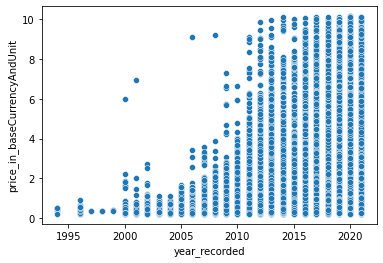

In [211]:
#multivariance
import seaborn as sbn
sns.scatterplot(sample['year_recorded'],sample['price_in_baseCurrencyAndUnit'])
plt.show()

In [123]:
#removing the ouutliers using percentile 
sample = sample[(sample.price_in_baseCurrencyAndUnit < max_threshold) & (sample.price_in_baseCurrencyAndUnit>min_threshold)]

In [124]:
sample.shape

(70382, 10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


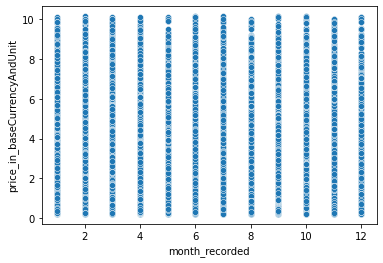

In [212]:
#multivariance
sns.scatterplot(sample['month_recorded'],sample['price_in_baseCurrencyAndUnit'])
plt.show()

In [127]:
#summary findings 
#takes only character values
sample.describe(include=['object'])

,country_name,commodity_purchased,market_type
count,70382,70382,70382
unique,45,499,2
top,Bassas da India,Sugar - Retail,Retail
freq,11388,2433,64287


In [128]:
#takes only numeric values
sample.describe()

,country_id,locality_id,pt_id,month_recorded,year_recorded,price_paid,price_in_baseCurrencyAndUnit
count,70382.000000,70382.000000,70382.000000,70382.000000,70382.000000,70382.000000,70382.000000
mean,222.984272,10361.443324,14.913401,6.308275,2017.005541,3.407301,1.424670
std,2196.994095,20577.817599,0.281248,3.387595,3.634875,16.350439,1.566969
min,1.000000,0.000000,14.000000,1.000000,1994.000000,0.040300,0.208000
25%,68.000000,1327.000000,15.000000,3.000000,2015.000000,0.500000,0.487500
50%,115.000000,1567.000000,15.000000,6.000000,2018.000000,0.931452,0.875435
75%,138.000000,1832.000000,15.000000,9.000000,2020.000000,1.925295,1.646455
max,40765.000000,112869.000000,15.000000,12.000000,2021.000000,858.000000,10.150000


In [132]:
sample[sample['market_type']=='Retail'].describe()

,country_id,locality_id,pt_id,month_recorded,year_recorded,price_paid,price_in_baseCurrencyAndUnit
count,64287.000000,64287.000000,64287.0,64287.000000,64287.000000,64287.000000,64287.000000
mean,237.633612,10317.829032,15.0,6.303016,2017.055968,1.865520,1.470847
std,2298.225134,20699.362216,0.0,3.389229,3.526493,5.281842,1.593202
min,1.000000,0.000000,15.0,1.000000,1994.000000,0.040300,0.208000
25%,90.000000,1489.000000,15.0,3.000000,2015.000000,0.500000,0.507750
50%,115.000000,1682.000000,15.0,6.000000,2018.000000,0.911167,0.912340
75%,138.000000,1833.000000,15.0,9.000000,2020.000000,1.762110,1.700000
max,40765.000000,112869.000000,15.0,12.000000,2021.000000,237.600000,10.150000


In [133]:
#summary only for retail as market type
sample[sample['market_type']=='Retail'].describe(include=['object'])

,country_name,commodity_purchased,market_type
count,64287,64287,64287
unique,42,334,1
top,Bassas da India,Sugar - Retail,Retail
freq,11255,2433,64287


In [134]:
#summary only for wholesale as market type
sample[sample['market_type']=='Wholesale'].describe(include=['object'])

,country_name,commodity_purchased,market_type
count,6095,6095,6095
unique,16,165,1
top,Colombia,"Rice (mixed, low quality) - Wholesale",Wholesale
freq,2398,240,6095


In [136]:
sample.median()

C:\Users\DELL\AppData\Local\Temp/ipykernel_3524/3406936744.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sample.median()


country_id                       115.000000
locality_id                     1567.000000
pt_id                             15.000000
month_recorded                     6.000000
year_recorded                   2018.000000
price_paid                         0.931452
price_in_baseCurrencyAndUnit       0.875435
dtype: float64

In [137]:
sample.mean()

C:\Users\DELL\AppData\Local\Temp/ipykernel_3524/642784991.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sample.mean()


country_id                        222.984272
locality_id                     10361.443324
pt_id                              14.913401
month_recorded                      6.308275
year_recorded                    2017.005541
price_paid                          3.407301
price_in_baseCurrencyAndUnit        1.424670
dtype: float64

In [138]:
sample.mode()

,country_id,country_name,locality_id,commodity_purchased,pt_id,market_type,month_recorded,year_recorded,price_paid,price_in_baseCurrencyAndUnit
0,115.0,Bassas da India,0,Sugar - Retail,15,Retail,3,2020,0.5,0.5


In [139]:
max(sample["price_in_baseCurrencyAndUnit"])-min(sample["price_in_baseCurrencyAndUnit"])

9.941999999999998

In [140]:
#getting min, max, median and some intermediate values for price
SpreadOfPrice=[sample["price_in_baseCurrencyAndUnit"].quantile(0),
sample["price_in_baseCurrencyAndUnit"].quantile(0.25),
sample["price_in_baseCurrencyAndUnit"].quantile(0.50),
sample["price_in_baseCurrencyAndUnit"].quantile(0.75),
sample["price_in_baseCurrencyAndUnit"].quantile(1)]
SpreadOfPrice

[0.20800000000000002, 0.4875, 0.8754352000000001, 1.646455, 10.149999999999999]

<AxesSubplot:>

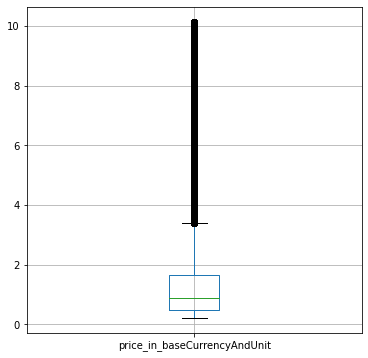

In [142]:
sample.boxplot(column="price_in_baseCurrencyAndUnit",
return_type='axes',
figsize=(6,6))

In [143]:
#variance
sample["price_in_baseCurrencyAndUnit"].var()

2.4553923499115218

In [144]:
#standard deviation 
sample["price_in_baseCurrencyAndUnit"].std()

1.5669691604851455

In [145]:
#Data visualization

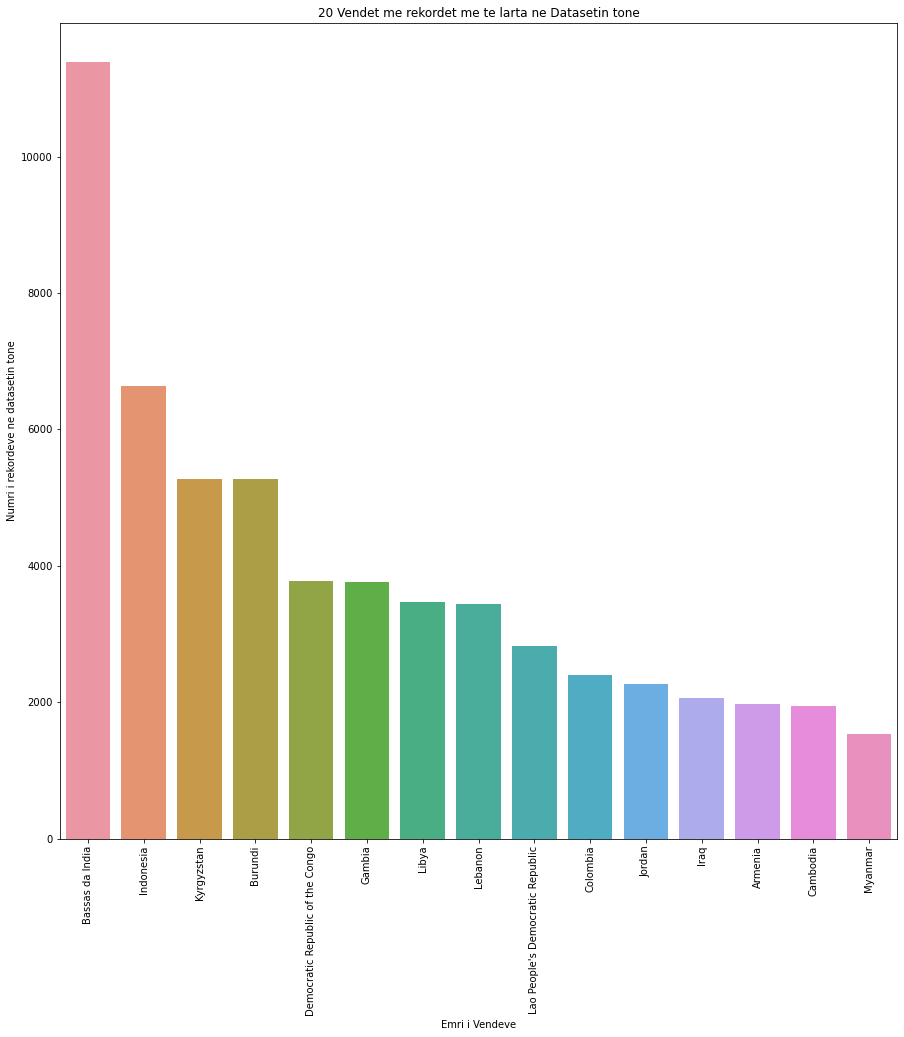

In [148]:
# Top 15 Countries with most records available

fig, ax = plt.subplots(1, 1, figsize=(15, 15), sharex=True)
top_15_sample = sample[["country_id", "country_name"]].groupby("country_name").agg(['count'])["country_id"]['count'].sort_values(ascending=False)[:15]
fig = sns.barplot( x = top_15_sample.index, y = top_15_sample.values, ax = ax)
fig.set_xticklabels(labels=top_15_sample.index , rotation=90)
fig.set_ylabel("Numri i rekordeve ne datasetin tone")
fig.set_xlabel("Emri i Vendeve")
fig.set_title("20 Vendet me rekordet me te larta ne Datasetin tone");

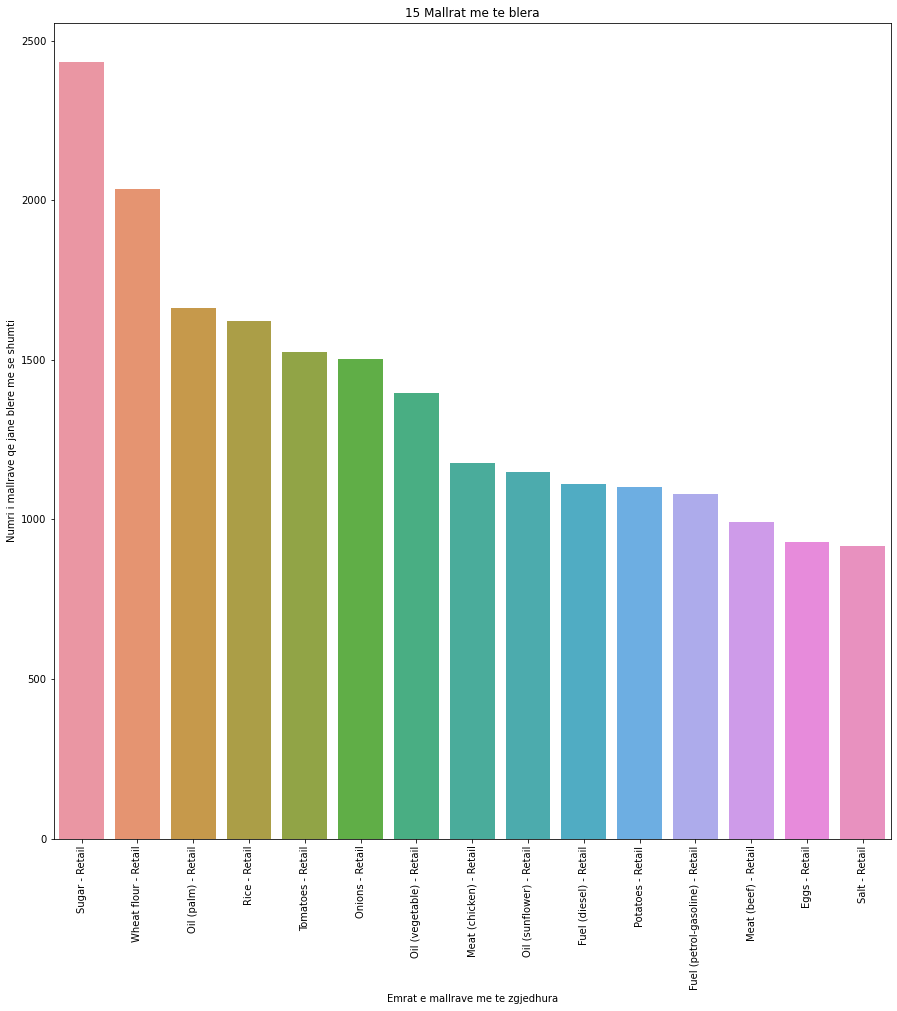

In [149]:
# Top 15 most reported commodites

fig, ax = plt.subplots(1, 1, figsize=(15, 15), sharex=True)
top_15_sample = sample[["country_id", "commodity_purchased"]].groupby("commodity_purchased").agg(['count'])["country_id"]['count'].sort_values(ascending=False)[:15]
fig = sns.barplot( x = top_15_sample.index, y = top_15_sample.values, ax=ax)
fig.set_xticklabels(labels=top_15_sample.index , rotation=90)
fig.set_ylabel("Numri i mallrave qe jane blere me se shumti")
fig.set_xlabel("Emrat e mallrave me te zgjedhura")
fig.set_title("15 Mallrat me te blera");

In [156]:
#Extract for one country analysis

IndonesiaSample = sample[sample["country_name"] == "Indonesia"]

In [158]:
# Create a Date Column

IndonesiaSample["Date"] = [  y+ " " +x for x,y in list(zip(IndonesiaSample["month_recorded"].astype(str).values, IndonesiaSample["year_recorded"].astype(str).values)) ]
IndonesiaSample["Date"] = pd.to_datetime(IndonesiaSample["Date"])

C:\Users\DELL\AppData\Local\Temp/ipykernel_3524/3152446215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IndonesiaSample["Date"] = [  y+ " " +x for x,y in list(zip(IndonesiaSample["month_recorded"].astype(str).values, IndonesiaSample["year_recorded"].astype(str).values)) ]
C:\Users\DELL\AppData\Local\Temp/ipykernel_3524/3152446215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IndonesiaSample["Date"] = pd.to_datetime(IndonesiaSample["Date"])


In [159]:
IndonesiaSample = IndonesiaSample.set_index("Date")

<Figure size 432x288 with 0 Axes>

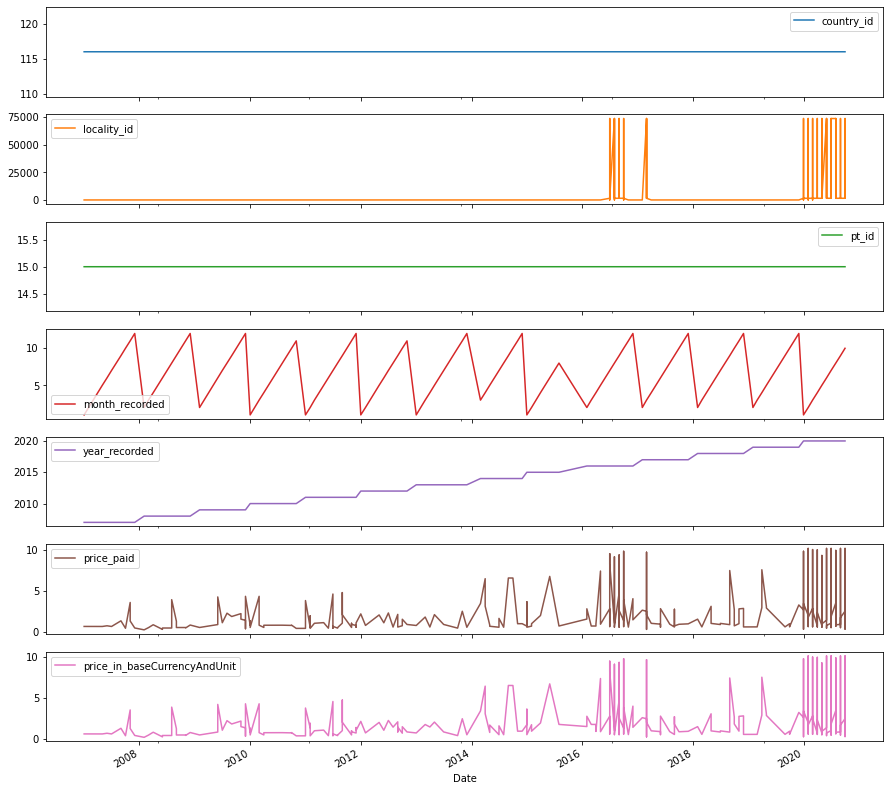

In [160]:
#Visualizaiton of data fields over time

plt.figure()
IndonesiaSample.plot(subplots=True, figsize=(15,15))
plt.xlabel("Date");

In [161]:
IndonesiaSample.head()

,country_id,country_name,locality_id,commodity_purchased,pt_id,market_type,month_recorded,year_recorded,price_paid,price_in_baseCurrencyAndUnit
Date,,,,,,,,,,
2016-10-01,116.0,Indonesia,1526,Chili (red) - Retail,15,Retail,10,2016,4.595500,4.595500
2016-10-01,116.0,Indonesia,1526,Chili (bird's eye) - Retail,15,Retail,10,2016,2.196250,2.196250
2016-08-01,116.0,Indonesia,1530,"Chili (red, curly) - Retail",15,Retail,8,2016,2.627258,2.627258
2020-01-01,116.0,Indonesia,1524,"Chili (red, large) - Retail",15,Retail,1,2020,3.640000,3.640000
2020-05-01,116.0,Indonesia,1533,Rice (medium quality) - Retail,15,Retail,5,2020,0.742000,0.742000


In [163]:
#Data Stats for the price column

sample['price_in_baseCurrencyAndUnit'].describe()

count    70382.000000
mean         1.424670
std          1.566969
min          0.208000
25%          0.487500
50%          0.875435
75%          1.646455
max         10.150000
Name: price_in_baseCurrencyAndUnit, dtype: float64

In [196]:
# Create a Date Column
sample["Date"] = [  y+ " " +x for x,y in list(zip(df["month_recorded"].astype(str).values, sample["year_recorded"].astype(str).values)) ]
sample["Date"] = pd.to_datetime(sample["Date"])
sample = sample.set_index("Date")

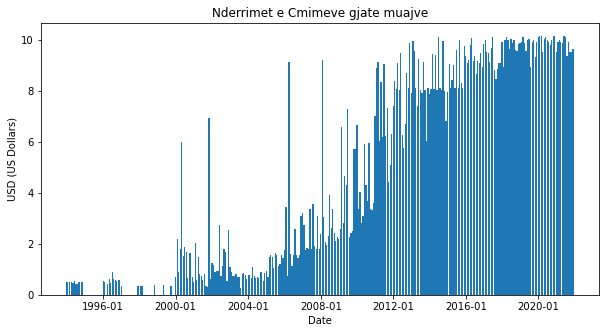

In [197]:
# Analyze the Monthly Change in price_paid
import matplotlib.dates as mdates
usd_month = sample.resample("M").mean()
fig, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(sample.index, sample["price_in_baseCurrencyAndUnit"], width=25, align='center')
ax.set_ylabel("USD (US Dollars)")
ax.set_xlabel('Date')
ax.set_title("Nderrimet e Cmimeve gjate muajve");

            country_id                      country_name  locality_id  \
Date                                                                    
2011-01-01       115.0                   Bassas da India         1508   
2012-02-01       231.0                         Sri Lanka         2740   
2018-03-01       145.0                             Libya         1836   
2020-04-01       106.0                            Guinea        40702   
2012-05-01       138.0                        Kyrgyzstan         1748   
...                ...                               ...          ...   
2017-02-01        90.0                            Gambia         1290   
2021-03-01       118.0                              Iraq         1566   
2020-04-01       116.0                         Indonesia         1526   
2013-05-01        68.0  Democratic Republic of the Congo         1071   
2015-06-01       115.0                   Bassas da India         1484   

                         commodity_purchased  pt_i

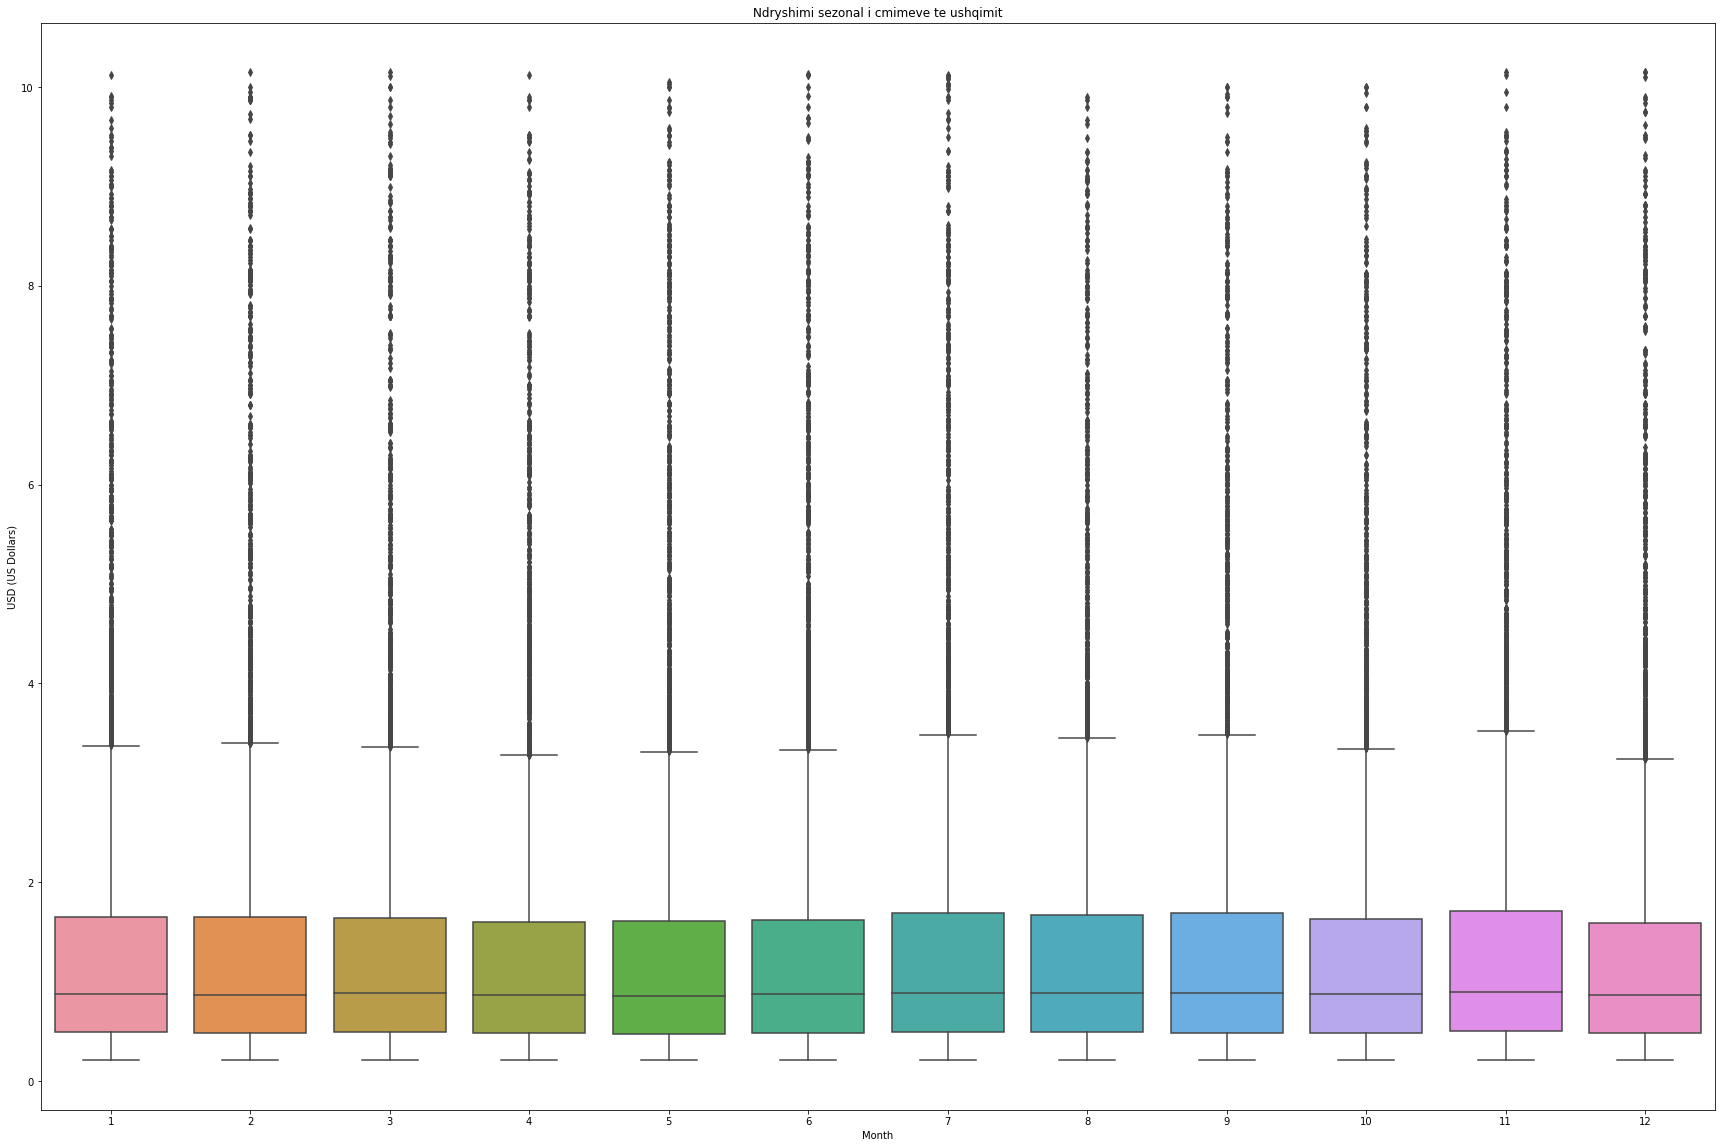

In [199]:
# Analyze the Seasonal Change of food price in last 8 years

sample_last_two = sample
fig, ax = plt.subplots(1, 1, figsize=(30, 20), sharex=True)
sns.boxplot(data = sample_last_two, x=sample_last_two.index.month, y='price_in_baseCurrencyAndUnit', ax=ax)
ax.set_ylabel("USD (US Dollars)")
ax.set_title('Ndryshimi sezonal i cmimeve te ushqimit')
ax.set_xlabel('Month');
if (sample['price_in_baseCurrencyAndUnit'] < 100000).all():
    print(sample)

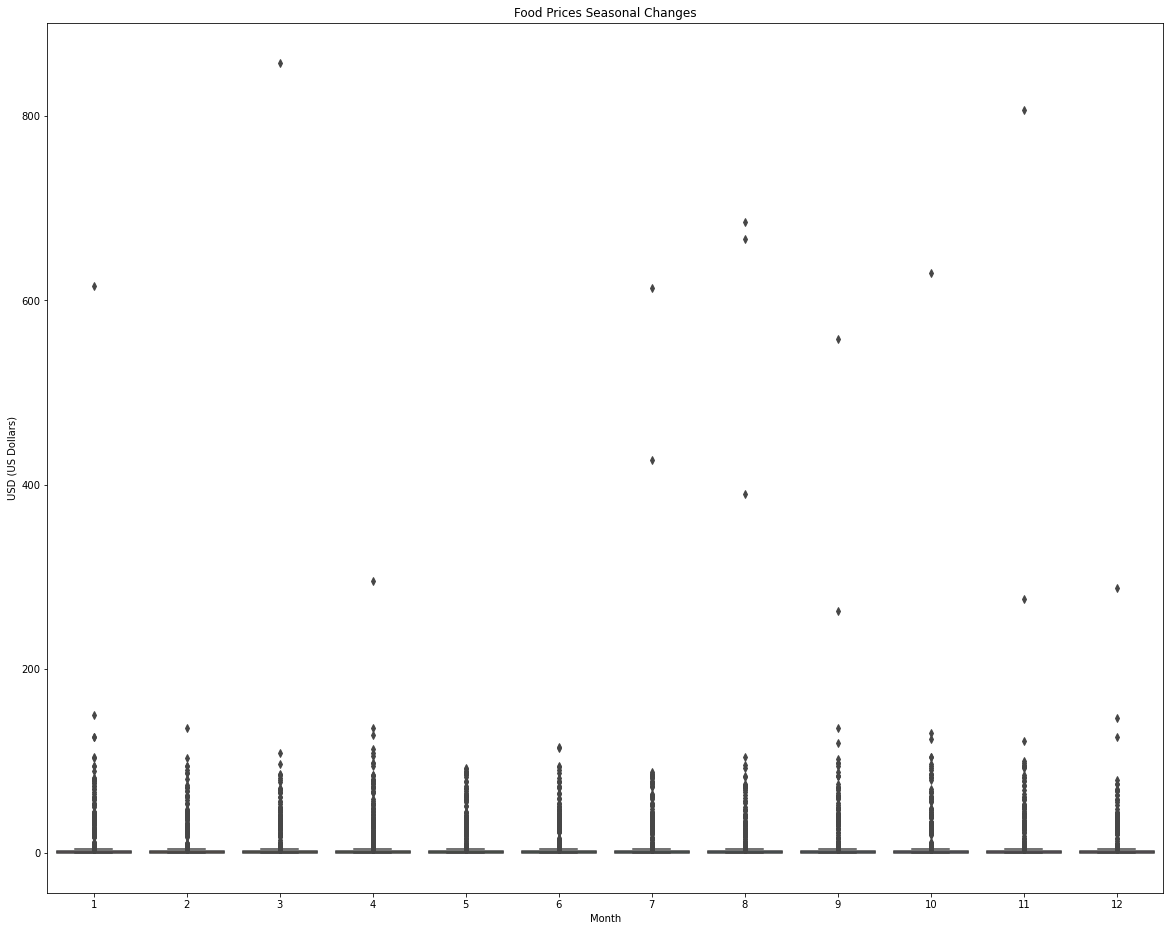

In [201]:
# Analyze the Seasonal Change of food price in last two years

sample_last_two = sample.loc['2019-01-01':'2021-01-01']
fig, ax = plt.subplots(1, 1, figsize=(20, 16), sharex=True)
sns.boxplot(data = sample_last_two, x=sample_last_two.index.month, y='price_paid', ax=ax)
ax.set_ylabel("USD (US Dollars)")
ax.set_title('Food Prices Seasonal Changes')
ax.set_xlabel('Month');

In [202]:
# Monthly and weekly sampling for 8 years

sample_month=sample.loc['2013-01-01':'2021-01-01'].resample("M").mean()
sample_week = sample.loc['2013-01-01':'2021-01-01'].resample("W").mean()

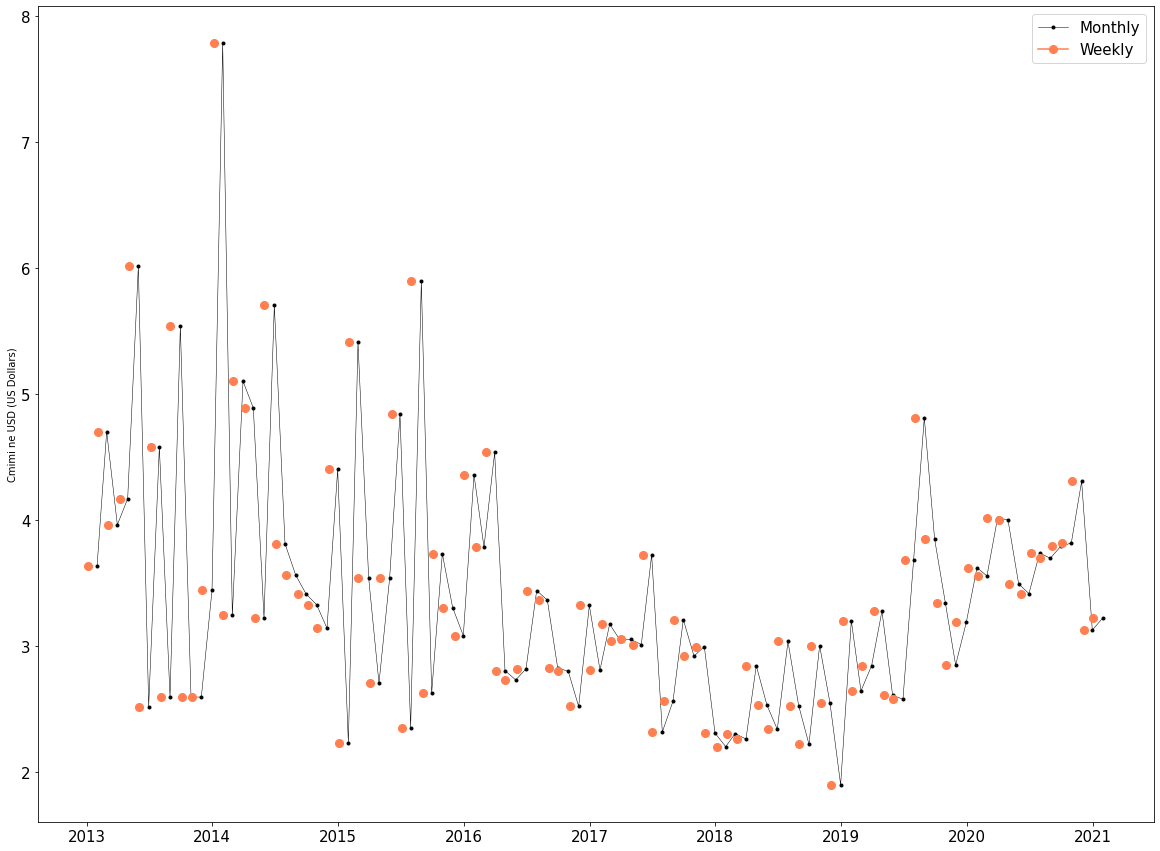

In [203]:
# Comparing Average plots from 2013 to 2021

fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(sample_month["price_paid"], marker='.', linestyle='-', linewidth = 0.5, label='Monthly', color='black')
ax.plot(sample_week["price_paid"], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.set_ylabel("Cmimi ne USD (US Dollars)")
plt.tick_params(labelsize=15)
ax.legend(prop={"size":15});

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


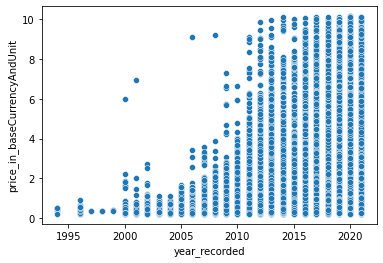